1. Draw a boxplot showing the area size distribution for each shape.

<AxesSubplot:title={'center':'area'}, xlabel='shape'>

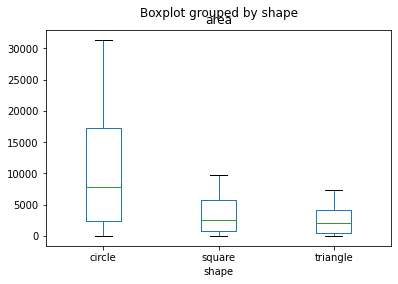

In [1]:
import matplotlib
import pandas as pd

df = pd.read_csv('data.csv')

boxplot = df.boxplot(by='shape',column=['area'], grid=False)

boxplot

2. Calculate the mean, max, and standard deviation of the area size of each color.

Mean of the color

In [2]:
df.groupby('color', as_index=False)['area'].mean()

,color,area
0,blue,3208.131667
1,green,5761.119231
2,red,3815.871034
3,yellow,4538.208088


Max of the color

In [3]:
df.groupby('color', as_index=False)['area'].max()

,color,area
0,blue,21642.4
1,green,27759.1
2,red,31415.9
3,yellow,31415.9


Standard deviation

In [4]:
df.groupby('color', as_index=False)['area'].std()

,color,area
0,blue,3039.212965
1,green,6695.029606
2,red,5092.678377
3,yellow,5352.460578


3. What is the average area size of a yellow square?

In [5]:
total = 0
count = 0

for index, row in df.iterrows():
    if row['shape'] == 'square' and row['color'] =='yellow':
        count +=1
        total = row['area']
average = total/count
print("Average Area Size:")
print(average)

Average Area Size:
33.31531531531532


4. Which shape is most likely to be green?

In [6]:
scount = 0
tcount = 0
ccount = 0
#goes through the df and gets only the green for each shape
for index, row in df.iterrows():
    if row['shape'] == 'square' and row['color'] =='green':
        scount +=1
    if row['shape'] == 'triangle' and row['color'] == 'green':
        tcount +=1
    if row['shape'] == 'circle' and row['color'] == 'green':
        ccount +=1
df2 = df['shape'].value_counts().reset_index(name='count')
df2

,index,count
0,square,477
1,triangle,403
2,circle,120


calculation for each shape

In [7]:
for index, row in df2.iterrows():
    #prints and does each calculation in the df
    if row['index'] == 'square':
        print('square')
        print(scount/row['count'])
    if row['index'] == 'circle':
        print('circle')
        print(ccount/row['count'])
    if row['index'] == 'square':
        print('triange')
        print(tcount/row['count'])

square
0.09853249475890985
triange
0.0
circle
0.25833333333333336


Circle is the most likely to be green

5. Given the fact that the object is red, with an area size larger than 3,000 - what are the chances the object is a square? a triangle? a circle?

In [8]:
scount = 0
tcount = 0
ccount = 0
count = 0
#goes through each row and then keeps track
for index, row in df.iterrows():
    if row['color']== 'red' and row['area'] > 3000:
        if row['shape'] == 'square':
            scount+=1
        if row['shape'] == 'circle':
            ccount+=1
        if row['shape'] == 'triangle':
            tcount+=1
        count += 1
print('square chance')
print(scount/count)
print('circle chance')
print(ccount/count)
print('triangle chance')
print(tcount/count)

square chance
0.168
circle chance
0.16
triangle chance
0.672


6. Write a function that calculates the side or radius of an object, depending on the shape and area of the object [for an equilateral triangle - area = (side ^ 2) * sqrt(3) / 4].

In [9]:
import math
radius = 0
#calculates the shapes
def calculate (shape, area):
    if shape=='circle':
        radius = math.sqrt(area/math.pi)
    if shape=='triangle':
        radius = (2/3)*(3**(3/4))*(math.sqrt(area))
    if shape=='square':
        radius = math.sqrt(area)
    return radius
        

7. Add a column to the dataset called "side" that shows the size matching the area in each row, round that number to the closest integer (shape side or radius).

In [10]:
sides = []
for index, row in df.iterrows():
    ans = calculate(row['shape'],row['area'])
    sides.append(ans)
df['side'] = sides
df

,shape,color,area,side
0,square,yellow,9409.0,97.000000
1,circle,yellow,4071.5,35.999982
2,triangle,blue,2028.0,68.435849
3,square,blue,3025.0,55.000000
4,square,blue,9216.0,96.000000
...,...,...,...,...
995,square,green,81.0,9.000000
996,square,yellow,4624.0,68.000000
997,circle,green,24884.6,89.000080
998,square,yellow,7396.0,86.000000


8. Draw a boxplot showing the side size distribution for each shape - what can you infer from this plot?

<AxesSubplot:title={'center':'side'}, xlabel='shape'>

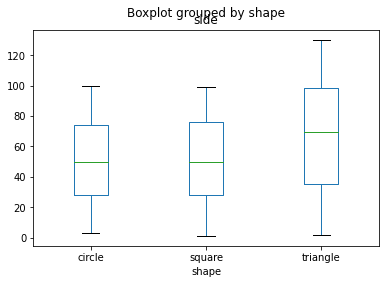

In [11]:
boxplot = df.boxplot(by='shape',column=['side'], grid=False)

boxplot

9. Make a scatter plot with "side" on the x axis, "area" on the y axis with a different color for each shape.

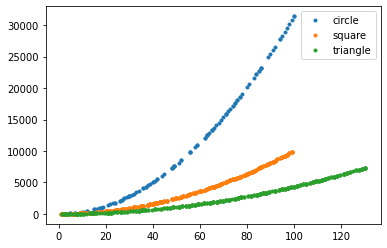

In [12]:
import matplotlib.pyplot as plt


groups = df.groupby('shape')
for name, group in groups:
    plt.plot(group.side, group.area, marker='o', linestyle='', markersize=3, label=name)
plt.legend()



10. Create a dataframe, table or list that show for each shape:

    a. The proportion of red objects within the shape

I'm outputting how many reds there are in total compared to the others, which shows 290.  29%

In [13]:
df4 = df["color"].value_counts()
df4


blue      360
red       290
yellow    272
green      78
Name: color, dtype: int64

pie chart of each porportion

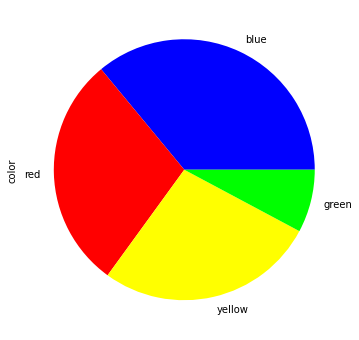

In [14]:
colors = ['#0000FF','#FF0000','#FFFF00', '#00FF00']
plot = df4.plot.pie(subplots=True, colors = colors, figsize=(11, 6))

b. The proportion of blue area out of the shape's total area (sum of square inch blue area of the shape over sum of all shape size).

This wording was very confusing to me.  I'm not exactly sure what it's asking.  
I'm outputting a dataframe of the sum of all areas for each color.  Since it says all shape sizes for blue.  

In [15]:
df5= df.groupby('color', as_index=False)['area'].sum()
df5

,color,area
0,blue,1154927.4
1,green,449367.3
2,red,1106602.6
3,yellow,1234392.6


Here is a Pie chart of all colors in terms of area.

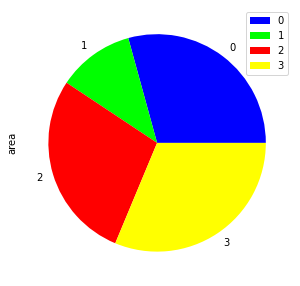

In [16]:
colors = ['#0000FF', '#00FF00','#FF0000','#FFFF00']
plot2 = df5.plot.pie(x='color',y='area', colors= colors, figsize=(5, 5))

In [17]:
total = df5['area'].sum()
total

3945289.9

In [18]:
blue = df5[df5['color']=='blue']['area']
print('proportion')
print(blue/total)

proportion
0    0.292736
Name: area, dtype: float64


11. Create a function that calculates 10. b. for a given shape and color.

In [19]:
#sums all the area based on a given shape and color
def calculates_porportion(shape, color):
    ans = df.loc[(df['shape'] == shape) & (df['color'] == color), 'area'].sum()
    return ans


porp = calculates_porportion('square', 'red')
total = df5['area'].sum()
print('porportion')
porp/total

porportion


0.04476857328025502